# Purpose
I was experiencing extreme difficulties with the Datablock API to combine the images and masks for the DRIVE dataset.

Going to experiment with stuff from the fast ai documentation to see if I can get a handle on this.

[FastAI Docs](https://docs.fast.ai/data_block.html#Examples-of-use)

In [1]:
from fastai.vision import *

In [2]:
path = untar_data(URLs.MNIST_TINY)
tfms = get_transforms(do_flip=False)
path.ls()

[PosixPath('/home/andrew/.fastai/data/mnist_tiny/labels.csv'),
 PosixPath('/home/andrew/.fastai/data/mnist_tiny/models'),
 PosixPath('/home/andrew/.fastai/data/mnist_tiny/train'),
 PosixPath('/home/andrew/.fastai/data/mnist_tiny/valid'),
 PosixPath('/home/andrew/.fastai/data/mnist_tiny/test')]

In [3]:
# Ahh this is actually some useful syntax for folder navigation with python I didn't know :-)
(path/'train').ls()

[PosixPath('/home/andrew/.fastai/data/mnist_tiny/train/3'),
 PosixPath('/home/andrew/.fastai/data/mnist_tiny/train/7')]

In [4]:
data = ImageDataBunch.from_folder(path, ds_tfms=tfms, size=64)

In [5]:
data = (ImageList.from_folder(path) #Where to find the data? -> in path and its subfolders
        .split_by_folder()              #How to split in train/valid? -> use the folders
        .label_from_folder()            #How to label? -> depending on the folder of the filenames
        .add_test_folder()              #Optionally add a test set (here default name is test)
        .transform(tfms, size=64)       #Data augmentation? -> use tfms with a size of 64
        .databunch())                   #Finally? -> use the defaults for conversion to ImageDataBunch

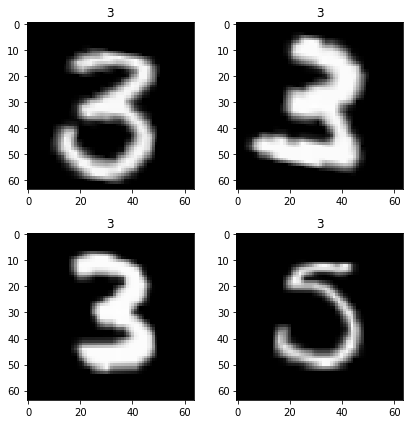

In [8]:
data.show_batch(2, figsize=(6,6), hide_axis=False)